# Data analysis

In [4]:
!pip install pyarrow

  Using cached pyarrow-19.0.0-cp312-cp312-win_amd64.whl.metadata (3.4 kB)
Using cached pyarrow-19.0.0-cp312-cp312-win_amd64.whl (25.2 MB)


In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import Prepare_Data
import pyarrow 

#autoreload download #pip install ipython
%load_ext autoreload
%autoreload 2

file_path_id_test="./data_test/top_5_percent_ids.csv"
# Sti til usa_dsf.parquet
file_path_usa_dsf = "./Data/usa_dsf.parquet"
file_path_usa = "./Data/usa.parquet"
file_path_market_returns = "./Data/market_returns.csv"
file_path_crsp_a_stock_with_id = "./Data/crsp_a_stock_codes.csv"
file_path_cluster_labels = "./Data/Cluster Labels.csv"
file_path_factor_details = "./Data/Factor Details.xlsx"
file_path_tsla = "./Data/tsla101.csv"

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
from Prepare_Data import load_and_filter_market_returns
def filter_and_save_data(file_path, start_date, end_date, output_path):
    """
    Indlæser vores market returns, filtrerer data efter start/slutdato, og gemmer den filtrerede version.

    Parametre:
    file_path (str): Sti til input CSV-fil.
    start_date (str): Startdato i format 'YYYY-MM-DD'.
    end_date (str): Slutdato i format 'YYYY-MM-DD'.
    output_path (str): Sti til output CSV-fil.

    Example:
    file_path_market_returns = "./Data/market_returns.csv"
    output_path = "data_test/market_returns_test.csv"
    start_date = "2010-01-31"
    end_date = "2023-11-30"
    filter_and_save_data(file_path_market_returns, start_date, end_date, output_path)
    """

    # Læs CSV-fil
    market_returns = load_and_filter_market_returns(file_path)

    # Konverter eom til datetime-format
    market_returns['eom'] = pd.to_datetime(market_returns['eom'])

    # Filtrer data baseret på dato
    filtered_df = market_returns[(market_returns['eom'] >= start_date) & (market_returns['eom'] <= end_date)]

    # Gem den filtrerede data til en ny CSV-fil
    filtered_df.to_csv(output_path, index=False)

    print(f"Fil gemt som {output_path} med {len(filtered_df)} rækker.")

# Eksempel på anvendelse:
# filter_and_save_data("data/market_returns.csv", "2010-01-31", "2023-11-30", "data/filtered_market_returns.csv")


In [20]:
    file_path_market_returns = "./Data/market_returns.csv"
    output_path_market_returns = "data_test/market_returns_test.csv"
    start_date = "2010-01-31"
    end_date = "2023-11-30"
    filter_and_save_data(file_path_market_returns, start_date, end_date, output_path_market_returns)

Filen er indlæst og filtreret succesfuldt.
Fil gemt som data_test/market_returns_test.csv med 167 rækker.


Filen er indlæst og filtreret succesfuldt.


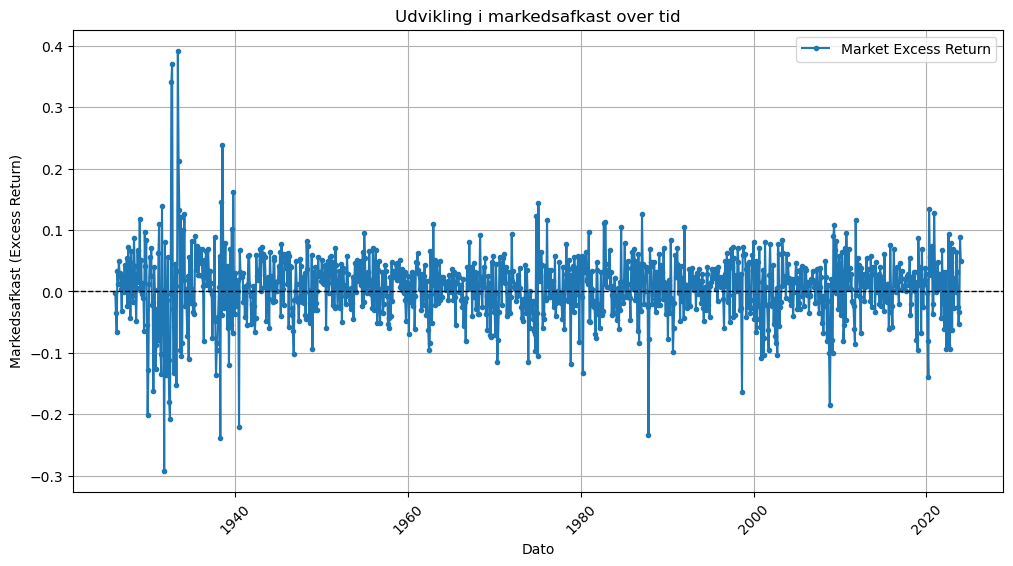

In [12]:
from Prepare_Data import load_and_filter_market_returns
market_returns = load_and_filter_market_returns(file_path_market_returns)

market_returns['eom'] = pd.to_datetime(market_returns['eom'])

# Opret figuren
plt.figure(figsize=(12, 6))
plt.plot(market_returns['eom'], market_returns['mkt_vw_exc'], linestyle='-', marker='o', markersize=3, label="Market Excess Return")

# Tilføj en horisontal linje ved nul for reference
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Formatering af plot
plt.xlabel("Dato")
plt.ylabel("Markedsafkast (Excess Return)")
plt.title("Udvikling i markedsafkast over tid")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotér datoetiketter for bedre læsbarhed

# Vis plot
plt.show()

C:\Users\andre\AppData\Local\Temp\ipykernel_44228\893345959.py:8: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  annual_returns = market_returns.resample('Y', on='eom').mean()


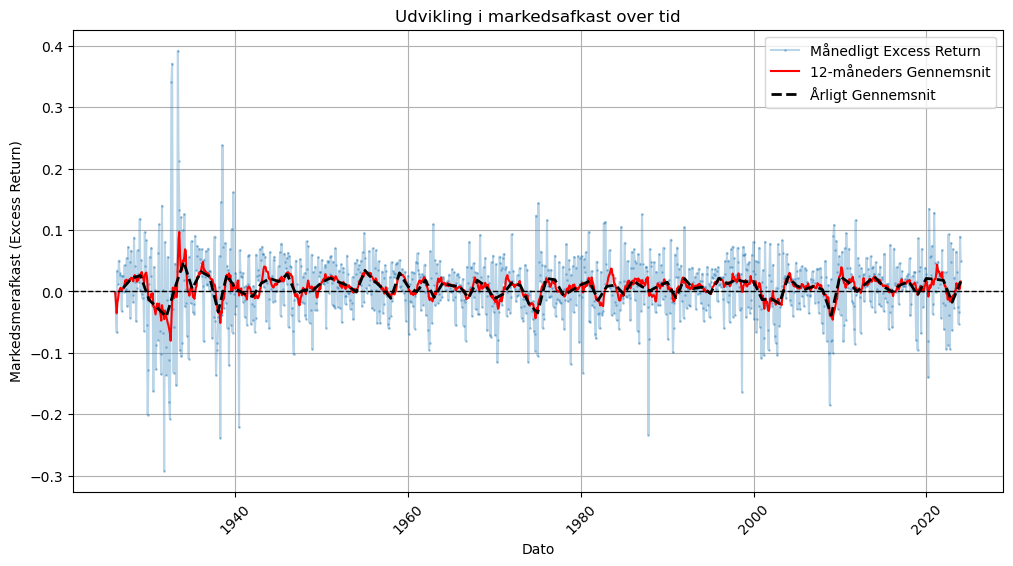

In [15]:
# Konverter eom til datetime-format
market_returns['eom'] = pd.to_datetime(market_returns['eom'])

# Beregn et 12-måneders glidende gennemsnit (1-års gennemsnit)
market_returns['rolling_avg'] = market_returns['mkt_vw_exc'].rolling(window=12, min_periods=1).mean()

# Resample data til årlige værdier for bedre overblik
annual_returns = market_returns.resample('Y', on='eom').mean()

# Plot original data med lav alpha (gennemsigtighed)
plt.figure(figsize=(12, 6))
plt.plot(market_returns['eom'], market_returns['mkt_vw_exc'], linestyle='-', marker='o', markersize=1, alpha=0.3, label="Månedligt Excess Return")

# Tilføj glidende gennemsnit for en tydeligere trend
plt.plot(market_returns['eom'], market_returns['rolling_avg'], color='red', linewidth=1.5, label="12-måneders Gennemsnit")

# Tilføj årsresamplet trendlinje
plt.plot(annual_returns.index, annual_returns['mkt_vw_exc'], color='black', linestyle='dashed', linewidth=2, label="Årligt Gennemsnit")

# Tilføj en horisontal linje ved 0
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Formatering af plot
plt.xlabel("Dato")
plt.ylabel("Markedsmerafkast (Excess Return)")
plt.title("Udvikling i markedsafkast over tid")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)  # Bedre læsbarhed af datoer

# Vis plot
plt.show()

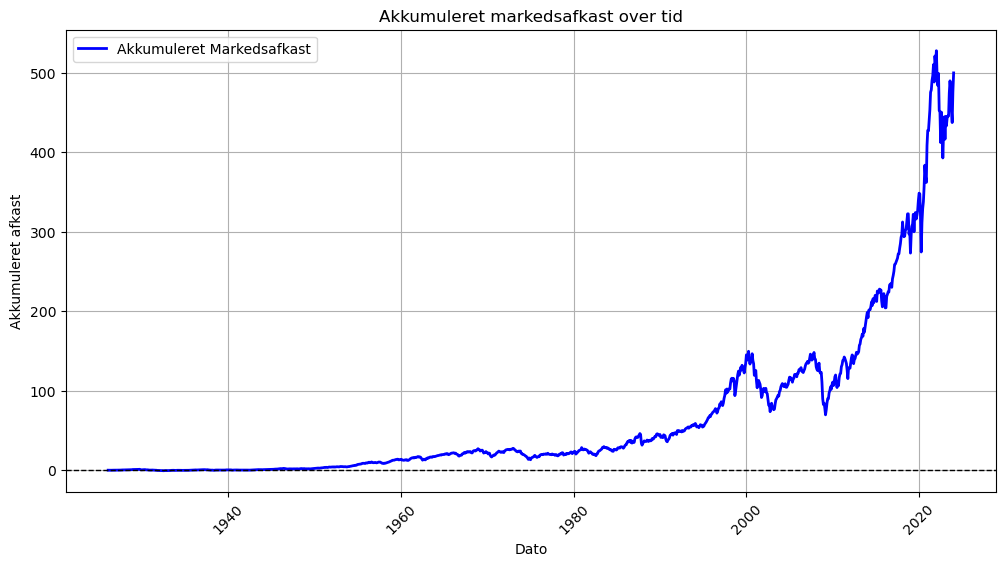

In [14]:
# Konverter eom til datetime-format
market_returns['eom'] = pd.to_datetime(market_returns['eom'])

# Beregn akkumuleret afkast
market_returns['cumulative_return'] = (1 + market_returns['mkt_vw_exc']).cumprod() - 1

# Plot akkumuleret afkast
plt.figure(figsize=(12, 6))
plt.plot(market_returns['eom'], market_returns['cumulative_return'], color='blue', linewidth=2, label="Akkumuleret Markedsafkast")

# Tilføj en horisontal linje ved 0 for reference
plt.axhline(0, color='black', linewidth=1, linestyle='--')

# Formatering af plot
plt.xlabel("Dato")
plt.ylabel("Akkumuleret afkast")
plt.title("Akkumuleret markedsafkast over tid")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Bedre læsbarhed af datoer

# Vis plot
plt.show()

In [2]:
df = pd.read_parquet(file_path_usa_dsf, engine='pyarrow')
print("Fil indlæst med succes.")

Fil indlæst med succes.


In [46]:
def filter_ids_from_dataset(file_path_usa_dsf, file_path_id_test, output_path, start_date):
    """
    Indlæser dataset fra en Parquet-fil, beholder kun ID'er fra en liste, filtrerer på startdato og gemmer resultatet.

    Args:
        file_path_usa_dsf (str): Sti til den originale Parquet-fil.
        file_path_id_test (str): Sti til CSV-filen med ID'er, der skal beholdes.
        output_path (str): Sti til at gemme det filtrerede dataset.
        start_date (str): Startdato i formatet 'YYYY-MM-DD' for at filtrere data.

        Example:
        file_path_usa_dsf = "./Data/usa_dsf.parquet"  # Din input Parquet-fil
        file_path_id_test = "./data_test/top_5_percent_ids.csv"  # CSV-fil med ID'er
        output_path = "./data_test/filtered_data.parquet"  # Output-fil
        start_date = "2010-01-31"  # Vælg din startdato

        filter_ids_from_dataset(file_path_usa_dsf, file_path_id_test, output_path, start_date)
    """
    # Indlæs det oprindelige dataset
    df = pd.read_parquet(file_path_usa_dsf, engine='pyarrow')
    print("Fil indlæst med succes. Antal rækker før filtrering:", len(df))

    # Indlæs ID'erne, der skal beholdes
    df_ids = pd.read_csv(file_path_id_test)
    ids_to_keep = set(df_ids['id'])  # Konverter til et set for hurtigere opslag

    # Filtrer dataset ved kun at beholde de ID'er fra CSV-filen
    df_filtered = df[df['id'].isin(ids_to_keep)].copy()  # Tilføj .copy() for at undgå advarsler
    print("Filtrering af ID'er udført. Antal rækker efter filtrering:", len(df_filtered))

    # Tjek om 'eom' findes, og find alternativ hvis ikke
    if 'eom' not in df_filtered.columns:
        alternative_columns = ['date', 'timestamp', 'end_of_month', 'period']
        found_col = None
        for col in alternative_columns:
            if col in df_filtered.columns:
                found_col = col
                df_filtered.loc[:, 'eom'] = df_filtered[col]  # Brug .loc for at undgå warning
                print(f"Bruger '{col}' i stedet for 'eom'.")
                break
        if not found_col:
            raise KeyError("Kolonnen 'eom' findes ikke i dataset. Tjek dine data.")

    # Konverter 'eom' til datetime for filtrering
    df_filtered.loc[:, 'eom'] = pd.to_datetime(df_filtered['eom'], errors='coerce')

    # Filtrer på startdato
    df_filtered = df_filtered[df_filtered['eom'] >= pd.to_datetime(start_date)]
    print(f"Filtrering på startdato {start_date} udført. Antal rækker efter filtrering:", len(df_filtered))

    # Udskriv antal unikke virksomheder efter filtrering
    unique_companies = df_filtered['id'].nunique()
    print(f"Antal unikke virksomheder efter filtrering: {unique_companies}")

    # Gem det filtrerede dataset som en Parquet-fil
    df_filtered.to_parquet(output_path, engine='pyarrow', index=False)
    print(f"Fil gemt som {output_path}")

In [47]:
file_path_usa_dsf = "./Data/usa_dsf.parquet"  # Din input Parquet-fil
file_path_id_test = "./data_test/top_5_percent_ids.csv"  # CSV-fil med ID'er
output_path = "./data_test/usa_dsf_test.parquet"  # Output-fil
start_date = "2010-01-31"  # Vælg din startdato

filter_ids_from_dataset(file_path_usa_dsf, file_path_id_test, output_path, start_date)


Fil indlæst med succes. Antal rækker før filtrering: 176877668
Filtrering af ID'er udført. Antal rækker efter filtrering: 2179398
Bruger 'date' i stedet for 'eom'.
Filtrering på startdato 2010-01-31 udført. Antal rækker efter filtrering: 602512
Antal unikke virksomheder efter filtrering: 172
Fil gemt som ./data_test/usa_dsf_test.parquet


In [48]:
file_path_usa = "./Data/usa.parquet"
file_path_id_test = "./data_test/top_5_percent_ids.csv"  # CSV-fil med ID'er
output_path = "./data_test/usa_test.parquet"  # Output-fil
start_date = "2010-01-31"  # Vælg din startdato

filter_ids_from_dataset(file_path_usa, file_path_id_test, output_path, start_date)


Fil indlæst med succes. Antal rækker før filtrering: 1373911
Filtrering af ID'er udført. Antal rækker efter filtrering: 90352
Filtrering på startdato 2010-01-31 udført. Antal rækker efter filtrering: 28713
Antal unikke virksomheder efter filtrering: 172
Fil gemt som ./data_test/usa_test.parquet


In [49]:
import pandas as pd

def filter_ids_from_dataset(file_path_input, file_path_id_test, output_path, start_date):
    """
    Indlæser dataset fra en Parquet-fil, beholder kun ID'er fra en liste, filtrerer på startdato og gemmer resultatet.

    Args:
        file_path_input (str): Sti til den originale Parquet-fil (kan være usa_dsf eller usa).
        file_path_id_test (str): Sti til CSV-filen med ID'er, der skal beholdes.
        output_path (str): Sti til at gemme det filtrerede dataset.
        start_date (str): Startdato i formatet 'YYYY-MM-DD' for at filtrere data.

    Example:
        # Kør på usa_dsf data
        file_path_usa_dsf = "./Data/usa_dsf.parquet"  
        file_path_id_test = "./data_test/top_5_percent_ids.csv"  
        output_path = "./data_test/usa_dsf_test.parquet"  
        start_date = "2010-01-31"  
        filter_ids_from_dataset(file_path_usa_dsf, file_path_id_test, output_path, start_date)

        # Kør på usa data
        file_path_usa = "./Data/usa.parquet"  
        file_path_id_test = "./data_test/top_5_percent_ids.csv"  
        output_path = "./data_test/usa_test.parquet"  
        start_date = "2010-01-31"  
        filter_ids_from_dataset(file_path_usa, file_path_id_test, output_path, start_date)
    """

    # Indlæs det oprindelige dataset
    df = pd.read_parquet(file_path_input, engine='pyarrow')
    print(f"Fil {file_path_input} indlæst med succes. Antal rækker før filtrering:", len(df))

    # Indlæs ID'erne, der skal beholdes
    df_ids = pd.read_csv(file_path_id_test)
    ids_to_keep = set(df_ids['id'])  # Konverter til et set for hurtigere opslag

    # Filtrer dataset ved kun at beholde de ID'er fra CSV-filen
    df_filtered = df[df['id'].isin(ids_to_keep)].copy()  # Tilføj .copy() for at undgå advarsler
    print("Filtrering af ID'er udført. Antal rækker efter filtrering:", len(df_filtered))

    # Tjek om 'eom' findes, og find alternativ hvis ikke
    if 'eom' not in df_filtered.columns:
        alternative_columns = ['date', 'timestamp', 'end_of_month', 'period']
        found_col = None
        for col in alternative_columns:
            if col in df_filtered.columns:
                found_col = col
                df_filtered.loc[:, 'eom'] = df_filtered[col]  # Brug .loc for at undgå warning
                print(f"Bruger '{col}' i stedet for 'eom'.")
                break
        if not found_col:
            raise KeyError("Kolonnen 'eom' findes ikke i dataset. Tjek dine data.")

    # Konverter 'eom' til datetime for filtrering
    df_filtered.loc[:, 'eom'] = pd.to_datetime(df_filtered['eom'], errors='coerce')

    # Filtrer på startdato
    df_filtered = df_filtered[df_filtered['eom'] >= pd.to_datetime(start_date)]
    print(f"Filtrering på startdato {start_date} udført. Antal rækker efter filtrering:", len(df_filtered))

    # Udskriv antal unikke virksomheder efter filtrering
    unique_companies = df_filtered['id'].nunique()
    print(f"Antal unikke virksomheder efter filtrering: {unique_companies}")

    # Gem det filtrerede dataset som en Parquet-fil
    df_filtered.to_parquet(output_path, engine='pyarrow', index=False)
    print(f"Fil gemt som {output_path}")


In [50]:
# Kør for usa_dsf
filter_ids_from_dataset(
    file_path_input="./Data/usa_dsf.parquet",
    file_path_id_test="./data_test/top_5_percent_ids.csv",
    output_path="./data_test/usa_dsf_test.parquet",
    start_date="2010-01-31"
)

# Kør for usa
filter_ids_from_dataset(
    file_path_input="./Data/usa.parquet",
    file_path_id_test="./data_test/top_5_percent_ids.csv",
    output_path="./data_test/usa_test.parquet",
    start_date="2010-01-31"
)


Fil ./Data/usa_dsf.parquet indlæst med succes. Antal rækker før filtrering: 176877668
Filtrering af ID'er udført. Antal rækker efter filtrering: 2179398
Bruger 'date' i stedet for 'eom'.
Filtrering på startdato 2010-01-31 udført. Antal rækker efter filtrering: 602512
Antal unikke virksomheder efter filtrering: 172
Fil gemt som ./data_test/usa_dsf_test.parquet
Fil ./Data/usa.parquet indlæst med succes. Antal rækker før filtrering: 1373911
Filtrering af ID'er udført. Antal rækker efter filtrering: 90352
Filtrering på startdato 2010-01-31 udført. Antal rækker efter filtrering: 28713
Antal unikke virksomheder efter filtrering: 172
Fil gemt som ./data_test/usa_test.parquet


In [3]:
print("\nKolonner i datafilen:")
print(df.columns.tolist())
print("\nDataens størrelse:")
print(df.shape)
print("\nDatatyper for hver kolonne:")
print(df.dtypes)
df['date'] = pd.to_datetime(df['date'])
print(df.dtypes)  # Bekræft ændringen


Kolonner i datafilen:
['id', 'date', 'ret_exc']

Dataens størrelse:
(176877668, 3)

Datatyper for hver kolonne:
id           int32
date        object
ret_exc    float64
dtype: object
id                  int32
date       datetime64[ns]
ret_exc           float64
dtype: object


In [4]:
print("\nOversigt over data:")
print(df.head())
print(df.tail())


Oversigt over data:
      id       date   ret_exc
0  10000 1986-01-08 -0.024622
1  10000 1986-01-09 -0.000232
2  10000 1986-01-10 -0.000232
3  10000 1986-01-13  0.049768
4  10000 1986-01-14  0.047387
                  id       date   ret_exc
176877663  135612890 2024-01-25 -0.004723
176877664  135612890 2024-01-26 -0.000775
176877665  135612890 2024-01-29  0.020072
176877666  135612890 2024-01-30 -0.015359
176877667  135612890 2024-01-31  0.003618


In [5]:
# Find antallet af unikke værdier i id-kolonnen
unique_ids = df['id'].nunique()
print(f"Antal unikke id'er: {unique_ids}")


Antal unikke id'er: 63456


In [6]:
# Filtrér data for id = 10000
us_id_10000 = df[df['id'] == 10000]

# Vis de første par rækker i det nye dataset
print(us_id_10000.head())

# Kontroller størrelsen af det nye dataset
print(f"Antal rækker i us_id_10000: {us_id_10000.shape[0]}")


      id       date   ret_exc
0  10000 1986-01-08 -0.024622
1  10000 1986-01-09 -0.000232
2  10000 1986-01-10 -0.000232
3  10000 1986-01-13  0.049768
4  10000 1986-01-14  0.047387
Antal rækker i us_id_10000: 361


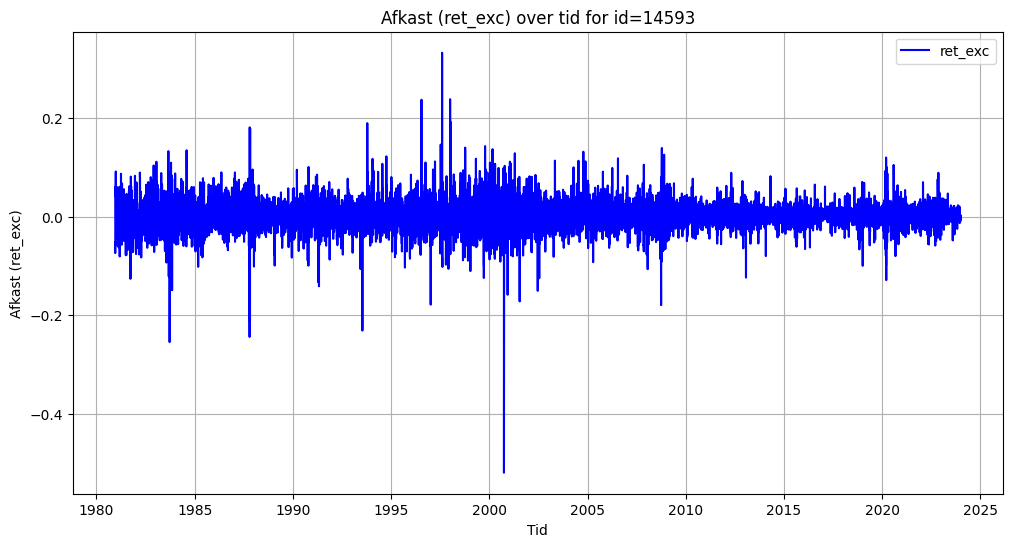

In [11]:
id_number =14593

data_to_plot = df[df['id'] == id_number]

plt.figure(figsize=(12, 6))
plt.plot(data_to_plot['date'], data_to_plot['ret_exc'], label='ret_exc', color='blue')

# Tilføj titler og labels
plt.title(f"Afkast (ret_exc) over tid for id={id_number}")
plt.xlabel("Tid")
plt.ylabel("Afkast (ret_exc)")
plt.grid(True)
plt.legend()
plt.show()

In [12]:
latest_row = df.loc[df['date'].idxmax()]

# Udskriv resultatet
latest_id = latest_row['id']
latest_date = latest_row['date']
print(f"ID med den seneste dato: {latest_id}")
print(f"Den seneste dato: {latest_date}")

ID med den seneste dato: 100100401
Den seneste dato: 2024-01-31 00:00:00


# få id

In [13]:
# Udtræk unikke ID'er
unique_ids = df['id'].unique()

# Gem unikke ID'er som en txt-fil
with open("unique_ids.txt", "w") as f:
    for unique_id in unique_ids:
        f.write(f"{unique_id}\n")

print("Filen 'unique_ids.txt' med unikke id'er er gemt.")


Filen 'unique_ids.txt' med unikke id'er er gemt.


In [14]:
unique_ids

array([    10000,     10001,     10002, ..., 135394590, 135400301,
       135612890])

# USA file

In [7]:
df_usa = pd.read_parquet(file_path_usa, engine='pyarrow')
print("Fil indlæst med succes.")

Fil indlæst med succes.


In [8]:
df_usa

,eom_ret,id,eom,valid_ret,excntry,me,sic,size_grp,ret_exc_lead1m,niq_su,...,ni_be,ocf_at,ocf_at_chg1,mispricing_perf,mispricing_mgmt,qmj,qmj_prof,qmj_growth,qmj_safety,ctff_test
0,1952-09-30,10006,1952-08-31,True,USA,23.885125,3740,small,-0.056756,NaN,...,0.100695,0.084642,0.038812,0.637818,0.669017,NaN,0.274990,NaN,-0.329044,False
1,1952-10-31,10006,1952-09-30,True,USA,22.076500,3740,small,-0.046028,NaN,...,0.100695,0.084642,0.038812,0.653567,0.627405,NaN,0.297905,NaN,-0.364834,False
2,1952-11-30,10006,1952-10-31,True,USA,21.088000,3740,small,0.112232,NaN,...,0.100695,0.084642,0.038812,0.497829,0.625762,NaN,0.342228,NaN,-0.244439,False
3,1952-12-31,10006,1952-11-30,True,USA,23.476875,3740,small,0.050879,NaN,...,0.100695,0.084642,0.038812,0.462569,0.626470,NaN,0.357438,NaN,-0.196596,False
4,1953-01-31,10006,1952-12-31,True,USA,24.218250,3740,small,-0.035634,NaN,...,0.100695,0.084642,0.038812,0.575019,0.667461,NaN,0.395463,NaN,-0.223198,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1373906,2020-06-30,129307001,2020-05-31,True,USA,1200.174950,6159,small,0.048621,-2.434489,...,0.138361,0.084512,0.185122,0.231834,0.503674,0.654589,1.562809,-0.308437,-0.021737,True
1373907,2020-07-31,129307001,2020-06-30,True,USA,1258.661300,6159,small,0.226496,-2.434489,...,0.138361,0.084512,0.185122,0.221448,0.508204,0.647734,1.562192,-0.314682,-0.030611,True
1373908,2020-08-31,129307001,2020-07-31,True,USA,1543.864400,6159,small,0.077106,-0.616114,...,0.103204,0.071433,-0.070719,0.484592,0.556104,0.264856,1.392421,-0.847281,0.183288,True
1373909,2020-09-30,129307001,2020-08-31,True,USA,1663.027600,6159,small,0.064202,-0.616114,...,0.103204,0.071433,-0.070719,0.662569,0.558626,0.330667,1.412538,-0.813256,0.218772,True


In [9]:
print("\nKolonner i datafilen:")
print(df_usa.columns.tolist())
print("\nDataens størrelse:")
print(df_usa.shape)
print("\nDatatyper for hver kolonne:")
print(df.dtypes)



Kolonner i datafilen:
['eom_ret', 'id', 'eom', 'valid_ret', 'excntry', 'me', 'sic', 'size_grp', 'ret_exc_lead1m', 'niq_su', 'ret_6_1', 'ret_12_1', 'saleq_su', 'tax_gr1a', 'ni_inc8q', 'prc_highprc_252d', 'resff3_6_1', 'resff3_12_1', 'be_me', 'debt_me', 'at_me', 'ret_60_12', 'ni_me', 'fcf_me', 'div12m_me', 'eqpo_me', 'eqnpo_me', 'sale_gr3', 'sale_gr1', 'ebitda_mev', 'sale_me', 'ocf_me', 'ival_me', 'bev_mev', 'netdebt_me', 'eq_dur', 'capex_abn', 'at_gr1', 'ppeinv_gr1a', 'noa_at', 'noa_gr1a', 'lnoa_gr1a', 'capx_gr1', 'capx_gr2', 'capx_gr3', 'chcsho_12m', 'eqnpo_12m', 'debt_gr3', 'inv_gr1', 'inv_gr1a', 'oaccruals_at', 'taccruals_at', 'cowc_gr1a', 'coa_gr1a', 'col_gr1a', 'nncoa_gr1a', 'ncoa_gr1a', 'ncol_gr1a', 'nfna_gr1a', 'sti_gr1a', 'lti_gr1a', 'fnl_gr1a', 'be_gr1a', 'oaccruals_ni', 'taccruals_ni', 'netis_at', 'eqnetis_at', 'dbnetis_at', 'niq_be', 'niq_be_chg1', 'niq_at', 'niq_at_chg1', 'ebit_bev', 'ebit_sale', 'sale_bev', 'at_turnover', 'gp_at', 'gp_atl1', 'ope_be', 'ope_bel1', 'op_at', 

In [10]:
# Filtrer kun USA og id <= 99999
df_usa = df_usa[(df_usa["excntry"] == "USA") & (df_usa["id"] <= 99999)]

In [12]:
df_usa.shape

(1370045, 163)

In [19]:
df_usa

,eom_ret,id,eom,valid_ret,excntry,me,sic,size_grp,ret_exc_lead1m,niq_su,...,ni_be,ocf_at,ocf_at_chg1,mispricing_perf,mispricing_mgmt,qmj,qmj_prof,qmj_growth,qmj_safety,ctff_test
0,1952-09-30,10006,1952-08-31,True,USA,23.885125,3740,small,-0.056756,NaN,...,0.100695,0.084642,0.038812,0.637818,0.669017,NaN,0.274990,NaN,-0.329044,False
1,1952-10-31,10006,1952-09-30,True,USA,22.076500,3740,small,-0.046028,NaN,...,0.100695,0.084642,0.038812,0.653567,0.627405,NaN,0.297905,NaN,-0.364834,False
2,1952-11-30,10006,1952-10-31,True,USA,21.088000,3740,small,0.112232,NaN,...,0.100695,0.084642,0.038812,0.497829,0.625762,NaN,0.342228,NaN,-0.244439,False
3,1952-12-31,10006,1952-11-30,True,USA,23.476875,3740,small,0.050879,NaN,...,0.100695,0.084642,0.038812,0.462569,0.626470,NaN,0.357438,NaN,-0.196596,False
4,1953-01-31,10006,1952-12-31,True,USA,24.218250,3740,small,-0.035634,NaN,...,0.100695,0.084642,0.038812,0.575019,0.667461,NaN,0.395463,NaN,-0.223198,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1370040,2023-08-31,93436,2023-07-31,True,USA,848821.192170,3711,mega,-0.039499,-3.092154,...,0.244537,0.152500,-0.057243,0.751176,0.313985,1.483319,1.155938,1.366387,0.751795,True
1370041,2023-09-30,93436,2023-08-31,True,USA,819144.328900,3711,mega,-0.034723,-3.092154,...,0.244537,0.152500,-0.057243,0.758914,0.316080,1.475441,1.149240,1.369258,0.723095,True
1370042,2023-10-31,93436,2023-09-30,True,USA,795449.383880,3711,mega,-0.202061,-3.092154,...,0.244537,0.152500,-0.057243,0.748447,0.338395,1.467047,1.141745,1.370498,0.706747,True
1370043,2023-11-30,93436,2023-10-31,True,USA,638454.482000,3711,mega,0.190955,-0.839182,...,0.238510,0.154055,-0.051424,0.819008,0.332520,1.516467,1.122580,1.434001,0.793023,True


In [14]:
print(df_usa['eom'].head())  # Tjek de første værdier
print(df_usa['eom'].dtype)   # Tjek datatype


0    1952-08-31 00:00:00
1    1952-09-30 00:00:00
2    1952-10-31 00:00:00
3    1952-11-30 00:00:00
4    1952-12-31 00:00:00
Name: eom, dtype: object
object


In [16]:
df_usa.loc[:, 'eom'] = pd.to_datetime(df_usa['eom'], errors='coerce')


# Tjek at konverteringen er lykkedes
print(df_usa['eom'].dtype)  # Skal nu vise datetime64[ns]
print(df_usa['eom'].head())  # Skal nu være formateret som Timestamps

# Filtrer kun data fra og med 2010
df_usa_filtered = df_usa[df_usa['eom'] >= pd.to_datetime('2010-01-01')]

# Bekræft ændringen
print(df_usa_filtered.head())
print(f"Antal observationer efter filtrering: {len(df_usa_filtered)}")

# Valider at filtreringen virker
print(df_usa_filtered['eom'].min())  # Skal vise en dato >= 2010-01-01

datetime64[ns]
0   1952-08-31
1   1952-09-30
2   1952-10-31
3   1952-11-30
4   1952-12-31
Name: eom, dtype: datetime64[ns]
        eom_ret     id        eom  valid_ret excntry          me   sic  \
722  2010-02-28  10026 2010-01-31       True     USA  768.969545  2050   
723  2010-03-31  10026 2010-02-28       True     USA  785.522303  2050   
724  2010-04-30  10026 2010-03-31       True     USA  800.456602  2050   
725  2010-05-31  10026 2010-04-30       True     USA  857.954853  2050   
726  2010-06-30  10026 2010-05-31       True     USA  818.178456  2050   

    size_grp  ret_exc_lead1m    niq_su  ...     ni_be    ocf_at  ocf_at_chg1  \
722    small        0.021516  1.271578  ...  0.111691  0.183329     0.048912   
723    small        0.020243  1.271578  ...  0.111691  0.183329     0.048912   
724    small        0.071663  1.271578  ...  0.111691  0.183329     0.048912   
725    small       -0.046474  0.642521  ...  0.119217  0.190904     0.043964   
726    small       -0.050150  0.

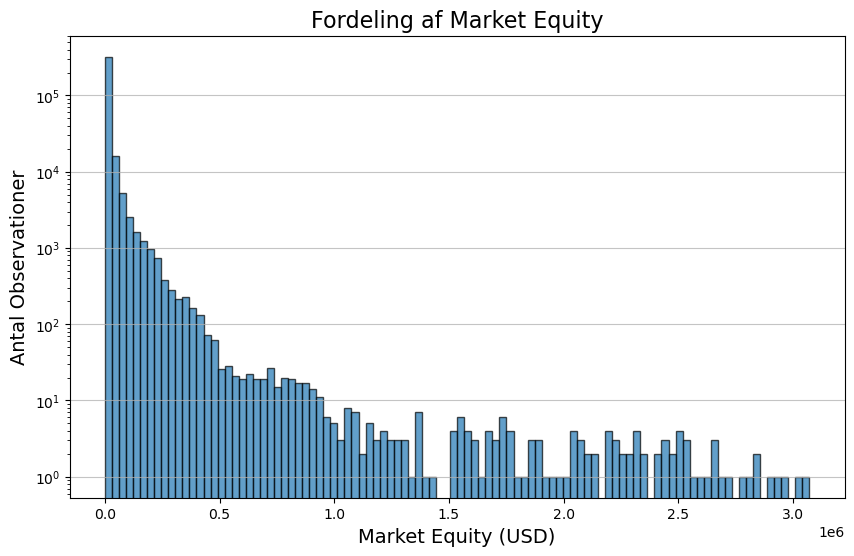

In [17]:
import matplotlib.pyplot as plt

# Fjern eventuelle null-værdier for at undgå problemer
df_usa_filtered = df_usa_filtered.dropna(subset=['market_equity'])

# Plot fordelingen af market_equity
plt.figure(figsize=(10, 6))
plt.hist(df_usa_filtered['market_equity'], bins=100, edgecolor='black', alpha=0.7)
plt.title('Fordeling af Market Equity', fontsize=16)
plt.xlabel('Market Equity (USD)', fontsize=14)
plt.ylabel('Antal Observationer', fontsize=14)
plt.yscale('log')  # Log-skala for bedre visualisering (valgfrit)
plt.grid(axis='y', alpha=0.75)
plt.show()


In [22]:
# Beregn median market equity for hver virksomhed
company_median_equity = df_usa_filtered.groupby('id')['market_equity'].median()

# Find 95. percentilen for virksomheders median market equity
threshold = company_median_equity.quantile(0.95)

# Udvælg top 5% af virksomhederne (dem med median market equity >= threshold)
top_5_ids = company_median_equity[company_median_equity >= threshold].index

# Filtrer df_usa_filtered, så det kun indeholder disse virksomheder
df_top_5 = df_usa_filtered[df_usa_filtered['id'].isin(top_5_ids)]

# Udskriv information
print(f"Grænseværdi for top 5% virksomheder: {threshold}")
print(f"Antal unikke virksomheder i top 5%: {len(top_5_ids)}")


Grænseværdi for top 5% virksomheder: 26164.374648199864
Antal unikke virksomheder i top 5%: 245


In [29]:
first_date

Timestamp('2010-01-31 00:00:00')

In [30]:
last_date

Timestamp('2023-11-30 00:00:00')

In [23]:
# Find første og sidste dato i dataset
first_date = df_top_5['eom'].min()
last_date = df_top_5['eom'].max()

# Filtrer virksomheder, der har data på både første og sidste dato
df_top_5 = df_top_5.groupby('id').filter(
    lambda x: (first_date in x['eom'].values) and (last_date in x['eom'].values)
)

# Udskriv antal unikke virksomheder efter filtrering
print(f"Antal unikke virksomheder med data på både første og sidste dato: {df_top_5['id'].nunique()}")


Antal unikke virksomheder med data på både første og sidste dato: 172


In [24]:
# Gem unikke virksomheder i en separat DataFrame
df_ids = pd.DataFrame(df_top_5['id'].unique(), columns=['id'])

# Gem til en CSV-fil uden index-kolonne
df_ids.to_csv("top_5_percent_ids.csv", index=False)

print("Fil gemt som 'top_5_percent_ids.csv'")


Fil gemt som 'top_5_percent_ids.csv'


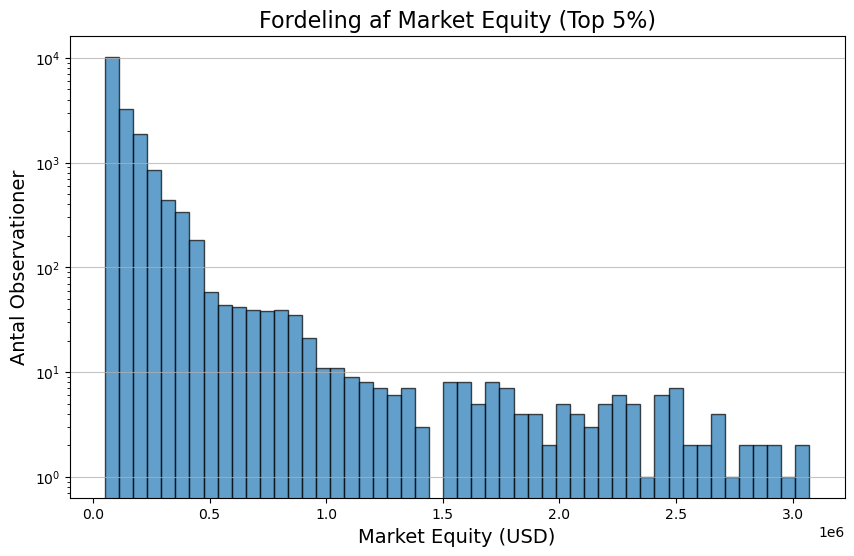

In [19]:
plt.figure(figsize=(10, 6))
plt.hist(df_top_5['market_equity'], bins=50, edgecolor='black', alpha=0.7)
plt.title('Fordeling af Market Equity (Top 5%)', fontsize=16)
plt.xlabel('Market Equity (USD)', fontsize=14)
plt.ylabel('Antal Observationer', fontsize=14)
plt.yscale('log')
plt.grid(axis='y', alpha=0.75)
plt.show()


In [18]:
# Find antallet af unikke værdier i id-kolonnen
unique_ids = df_usa['id'].nunique()
print(f"Antal unikke id'er: {unique_ids}")


Antal unikke id'er: 12476


In [19]:
# crsp id 
# Indlæs filen som en DataFrame
try:
    crsp_a_stock_df = pd.read_csv(file_path_crsp_a_stock_with_id)
    print("Filen er indlæst succesfuldt.")
    
    # Tjek DataFrame-indholdet
    print("\nDe første par rækker i filen:")
    print(crsp_a_stock_df.head())
    
    # Tjek kolonnerne
    print("\nKolonnenavne:")
    print(crsp_a_stock_df.columns.tolist())
    
except Exception as e:
    print(f"Der opstod en fejl ved indlæsning af filen: {e}")

Filen er indlæst succesfuldt.

De første par rækker i filen:
   PERMNO        date TICKER                  COMNAM  PERMCO
0   10026  2018-08-01   JJSF  J & J SNACK FOODS CORP    7976
1   10026  2018-08-02   JJSF  J & J SNACK FOODS CORP    7976
2   10026  2018-08-03   JJSF  J & J SNACK FOODS CORP    7976
3   10026  2018-08-06   JJSF  J & J SNACK FOODS CORP    7976
4   10026  2018-08-07   JJSF  J & J SNACK FOODS CORP    7976

Kolonnenavne:
['PERMNO', 'date', 'TICKER', 'COMNAM', 'PERMCO']


In [20]:
# Filtrér unikke kombinationer af PERMNO og COMNAM
unique_id_company_df = crsp_a_stock_df[['PERMNO', 'COMNAM']].drop_duplicates()

# Vis de første par rækker i den nye DataFrame
print(unique_id_company_df.head())

# Kontroller størrelsen af den nye DataFrame
print(f"Antal unikke id'er og firmanavne: {unique_id_company_df.shape[0]}")


      PERMNO                           COMNAM
0      10026           J & J SNACK FOODS CORP
1363   10028            D G S E COMPANIES INC
1711   10028                      ENVELA CORP
2726   10032                      PLEXUS CORP
4089   10044  ROCKY MOUNTAIN CHOC FAC INC NEW
Antal unikke id'er og firmanavne: 14374


In [21]:
df.head()

,id,date,ret_exc
0,10000,1986-01-08,-0.024622
1,10000,1986-01-09,-0.000232
2,10000,1986-01-10,-0.000232
3,10000,1986-01-13,0.049768
4,10000,1986-01-14,0.047387


In [22]:
# Sørg for, at kolonnenavne matcher for join
unique_id_company_df.rename(columns={'PERMNO': 'id'}, inplace=True)

# Join firmanavne til df
df_with_names = df.merge(unique_id_company_df, on='id', how='left')

# Vis de første par rækker i det nye dataset
print(df_with_names.head())

# Kontroller størrelsen af det nye dataset
print(f"Størrelsen på det nye dataset: {df_with_names.shape}")


      id       date   ret_exc COMNAM
0  10000 1986-01-08 -0.024622    NaN
1  10000 1986-01-09 -0.000232    NaN
2  10000 1986-01-10 -0.000232    NaN
3  10000 1986-01-13  0.049768    NaN
4  10000 1986-01-14  0.047387    NaN
Størrelsen på det nye dataset: (181680839, 4)


In [23]:
df_with_names.tail()

,id,date,ret_exc,COMNAM
181680834,135612890,2024-01-25,-0.004723,NaN
181680835,135612890,2024-01-26,-0.000775,NaN
181680836,135612890,2024-01-29,0.020072,NaN
181680837,135612890,2024-01-30,-0.015359,NaN
181680838,135612890,2024-01-31,0.003618,NaN


In [24]:
new_df_with_names = df_with_names.dropna()


In [25]:
new_df_with_names

,id,date,ret_exc,COMNAM
99652,10026,1986-02-05,0.042301,J & J SNACK FOODS CORP
99653,10026,1986-02-06,-0.034266,J & J SNACK FOODS CORP
99654,10026,1986-02-07,-0.014337,J & J SNACK FOODS CORP
99655,10026,1986-02-10,0.014034,J & J SNACK FOODS CORP
99656,10026,1986-02-11,-0.021379,J & J SNACK FOODS CORP
...,...,...,...,...
108186530,93436,2023-12-22,-0.007905,TESLA INC
108186531,93436,2023-12-26,0.015913,TESLA INC
108186532,93436,2023-12-27,0.018619,TESLA INC
108186533,93436,2023-12-28,-0.031797,TESLA INC


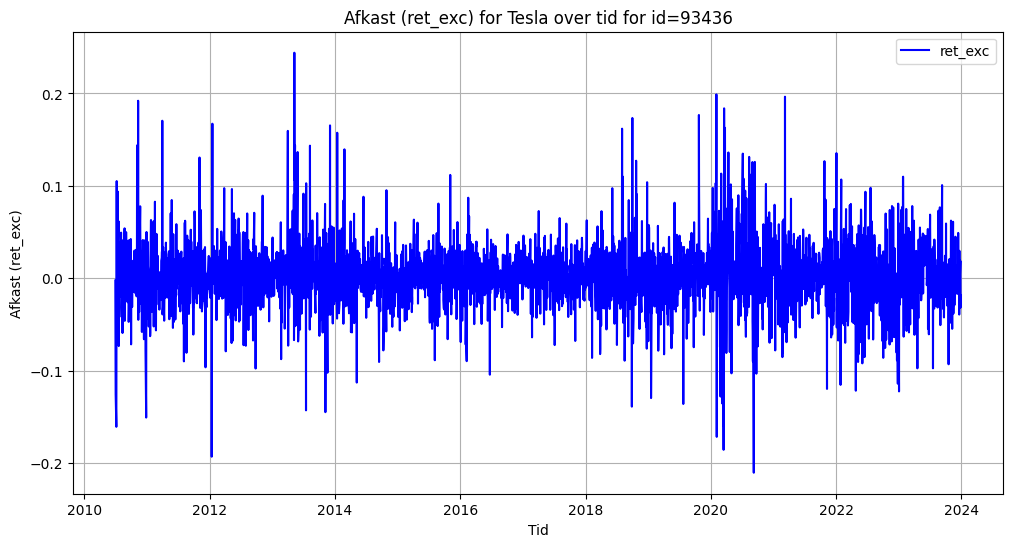

In [26]:
id_number =93436

data_to_plot = df[df['id'] == id_number]

plt.figure(figsize=(12, 6))
plt.plot(data_to_plot['date'], data_to_plot['ret_exc'], label='ret_exc', color='blue')

# Tilføj titler og labels
plt.title(f"Afkast (ret_exc) for Tesla over tid for id={id_number}")
plt.xlabel("Tid")
plt.ylabel("Afkast (ret_exc)")
plt.grid(True)
plt.legend()
plt.show()

In [27]:
data_to_plot.head()

,id,date,ret_exc
103379965,93436,2010-06-30,-0.002518
103379966,93436,2010-07-01,-0.078479
103379967,93436,2010-07-02,-0.125690
103379968,93436,2010-07-06,-0.160944
103379969,93436,2010-07-07,-0.019249


# Tesla fra rå data

In [28]:
tsla_df = pd.read_csv(file_path_tsla)
print("Filen er indlæst succesfuldt.")
tsla_df.head()

Filen er indlæst succesfuldt.


,PERMNO,date,TICKER,COMNAM,TSYMBOL,PERMCO,VOL,RET,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
0,93436,2010-06-29,TSLA,TESLA MOTORS INC,TSLA,53453,19088009,C,C,-0.032886,-0.032922,-0.031189,-0.031228,-0.031017
1,93436,2010-06-30,TSLA,TESLA MOTORS INC,TSLA,53453,17607305,-0.002511,-0.002511,-0.008948,-0.009029,-0.005544,-0.005580,-0.010113
2,93436,2010-07-01,TSLA,TESLA MOTORS INC,TSLA,53453,8379501,-0.078473,-0.078473,-0.003930,-0.004076,-0.007591,-0.007698,-0.003240
3,93436,2010-07-02,TSLA,TESLA MOTORS INC,TSLA,53453,5255750,-0.125683,-0.125683,-0.004749,-0.004793,-0.004375,-0.004430,-0.004662
4,93436,2010-07-06,TSLA,TESLA MOTORS INC,TSLA,53453,7011230,-0.160938,-0.160938,0.003316,0.003314,-0.006417,-0.006430,0.005359


In [29]:
data_to_plot.tail()

,id,date,ret_exc
103383359,93436,2023-12-22,-0.007905
103383360,93436,2023-12-26,0.015913
103383361,93436,2023-12-27,0.018619
103383362,93436,2023-12-28,-0.031797
103383363,93436,2023-12-29,-0.018767


In [30]:
tsla_df.tail()

,PERMNO,date,TICKER,COMNAM,TSYMBOL,PERMCO,VOL,RET,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
3395,93436,2023-12-22,TSLA,TESLA INC,TSLA,53453,93148541,-0.007701,-0.007701,0.002440,0.002372,0.007676,0.007387,0.001660
3396,93436,2023-12-26,TSLA,TESLA INC,TSLA,53453,86700724,0.016116,0.016116,0.005218,0.005199,0.009674,0.009299,0.004232
3397,93436,2023-12-27,TSLA,TESLA INC,TSLA,53453,106250779,0.018822,0.018822,0.001995,0.001807,0.005276,0.004907,0.001430
3398,93436,2023-12-28,TSLA,TESLA INC,TSLA,53453,113250680,-0.031594,-0.031594,-0.000108,-0.000295,0.002042,0.001428,0.000370
3399,93436,2023-12-29,TSLA,TESLA INC,TSLA,53453,100321201,-0.018564,-0.018564,-0.004045,-0.004084,-0.007480,-0.007546,-0.002826


In [31]:
tsla_df

,PERMNO,date,TICKER,COMNAM,TSYMBOL,PERMCO,VOL,RET,RETX,vwretd,vwretx,ewretd,ewretx,sprtrn
0,93436,2010-06-29,TSLA,TESLA MOTORS INC,TSLA,53453,19088009,C,C,-0.032886,-0.032922,-0.031189,-0.031228,-0.031017
1,93436,2010-06-30,TSLA,TESLA MOTORS INC,TSLA,53453,17607305,-0.002511,-0.002511,-0.008948,-0.009029,-0.005544,-0.005580,-0.010113
2,93436,2010-07-01,TSLA,TESLA MOTORS INC,TSLA,53453,8379501,-0.078473,-0.078473,-0.003930,-0.004076,-0.007591,-0.007698,-0.003240
3,93436,2010-07-02,TSLA,TESLA MOTORS INC,TSLA,53453,5255750,-0.125683,-0.125683,-0.004749,-0.004793,-0.004375,-0.004430,-0.004662
4,93436,2010-07-06,TSLA,TESLA MOTORS INC,TSLA,53453,7011230,-0.160938,-0.160938,0.003316,0.003314,-0.006417,-0.006430,0.005359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3395,93436,2023-12-22,TSLA,TESLA INC,TSLA,53453,93148541,-0.007701,-0.007701,0.002440,0.002372,0.007676,0.007387,0.001660
3396,93436,2023-12-26,TSLA,TESLA INC,TSLA,53453,86700724,0.016116,0.016116,0.005218,0.005199,0.009674,0.009299,0.004232
3397,93436,2023-12-27,TSLA,TESLA INC,TSLA,53453,106250779,0.018822,0.018822,0.001995,0.001807,0.005276,0.004907,0.001430
3398,93436,2023-12-28,TSLA,TESLA INC,TSLA,53453,113250680,-0.031594,-0.031594,-0.000108,-0.000295,0.002042,0.001428,0.000370


In [32]:
data_to_plot

,id,date,ret_exc
103379965,93436,2010-06-30,-0.002518
103379966,93436,2010-07-01,-0.078479
103379967,93436,2010-07-02,-0.125690
103379968,93436,2010-07-06,-0.160944
103379969,93436,2010-07-07,-0.019249
...,...,...,...
103383359,93436,2023-12-22,-0.007905
103383360,93436,2023-12-26,0.015913
103383361,93436,2023-12-27,0.018619
103383362,93436,2023-12-28,-0.031797


In [33]:
new_tsla_df = tsla_df.iloc[1:].reset_index(drop=True)
new_tsla_df = new_tsla_df.dropna()
new_data_to_plot = data_to_plot.dropna()
new_tsla_df['RET'] = pd.to_numeric(new_tsla_df['RET'])
new_tsla_df = new_tsla_df.reset_index(drop=True)
new_data_to_plot = new_data_to_plot.reset_index(drop=True)
print(new_tsla_df.index)
print(new_data_to_plot.index)

RangeIndex(start=0, stop=3399, step=1)
RangeIndex(start=0, stop=3399, step=1)


In [34]:


# Beregn dagsrenten
renten = new_tsla_df['RET'] - new_data_to_plot['ret_exc']

# Tjek de første par rækker for at bekræfte beregningen
print(renten)


0       0.000007
1       0.000006
2       0.000007
3       0.000006
4       0.000006
          ...   
3394    0.000204
3395    0.000203
3396    0.000203
3397    0.000203
3398    0.000203
Length: 3399, dtype: float64


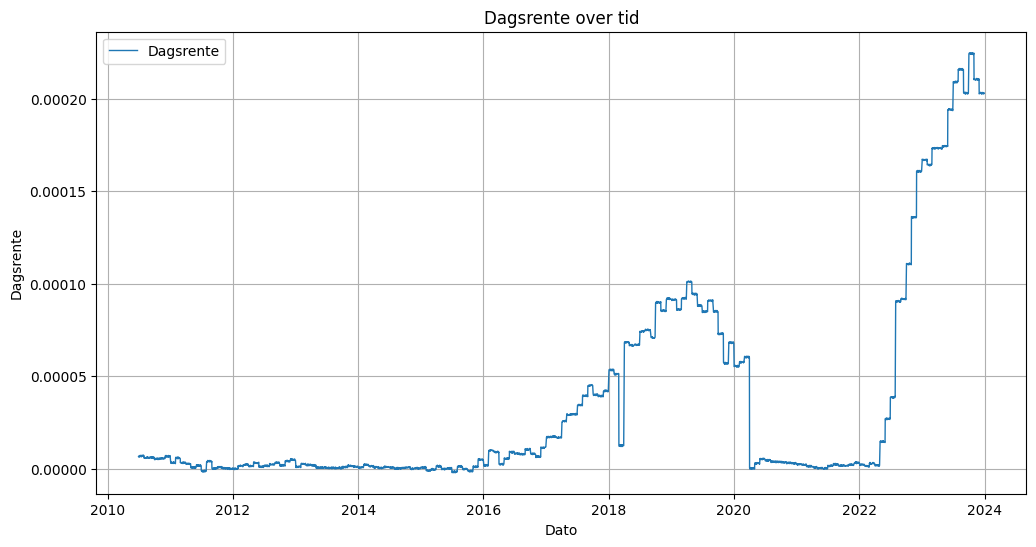

In [35]:
id_number =93436

data_to_plot = df[df['id'] == id_number]

plt.figure(figsize=(12, 6))
plt.plot(data_to_plot['date'], renten, label='Dagsrente', linewidth=1)

# Tilføj labels og titel
plt.xlabel('Dato')
plt.ylabel('Dagsrente')
plt.title('Dagsrente over tid')
plt.legend()
plt.grid(True)

# Vis plottet
plt.show()

# Risk Free Rate

In [4]:
import pandas as pd
from pandas.tseries.offsets import MonthEnd

def process_risk_free_rate(file_path, start_date, end_date=None, output_path="./data_test/risk_free_filtered.csv"):
    """
    Indlæser en CSV-fil med risikofri rente-data, konverterer datoer og filtrerer på startdato (og evt. slutdato),
    og gemmer resultatet som en CSV-fil i 'data_test'-mappen.

    Args:
        file_path (str): Stien til CSV-filen med risikofri rente-data.
        start_date (str): Startdato i formatet 'YYYY-MM-DD'.
        end_date (str, optional): Slutdato i formatet 'YYYY-MM-DD'. Hvis None, filtreres kun på startdato.
        output_path (str, optional): Sti til den filtrerede CSV-fil. Standard er "./data_test/risk_free_filtered.csv".

    Example:
        rente_path = "Data/ff3_m.csv"
        start_date = "2010-01-31"
        
        # Med både start- og slutdato
        end_date = "2023-11-30"
        process_risk_free_rate(rente_path, start_date, end_date)

        # Kun med startdato (ingen slutdato)
        process_risk_free_rate(rente_path, start_date)

    Returns:
        pd.DataFrame: En DataFrame med to kolonner: 'eom' (slutningen af måneden) og 'rf' (risikofri rente i procent).
    """
    # Læs data fra filen
    risk_free = pd.read_csv(file_path, usecols=["yyyymm", "RF"])

    # Opret nye kolonner for risikofri rente og slutningen af måneden
    risk_free['rf'] = risk_free['RF'] / 100  # Konverter risikofri rente til procent
    risk_free['eom'] = risk_free['yyyymm'].astype(str) + "01"
    risk_free['eom'] = pd.to_datetime(risk_free['eom'], format="%Y%m%d") + MonthEnd(0)

    # Filtrer på startdato
    risk_free = risk_free[risk_free['eom'] >= pd.to_datetime(start_date)]

    # Hvis slutdato er angivet, filtrer også på den
    if end_date is not None:
        risk_free = risk_free[risk_free['eom'] <= pd.to_datetime(end_date)]

    print(f"Filtrering udført. Antal rækker efter filtrering: {len(risk_free)}")

    # Gem det filtrerede dataset som CSV i `data_test`
    risk_free.to_csv(output_path, index=False)
    print(f"Fil gemt som {output_path}")

    # Returner det filtrerede DataFrame
    return risk_free[['eom', 'rf']]


In [6]:
rente_path = "Data/ff3_m.csv"
start_date = "2010-01-31"
end_date = "2023-11-30"
risk_free_df= process_risk_free_rate(rente_path, start_date, end_date, output_path="./data_test/risk_free_test.csv")
print(risk_free_df)

Filtrering udført. Antal rækker efter filtrering: 167
Fil gemt som ./data_test/risk_free_test.csv
            eom      rf
1002 2010-01-31  0.0000
1003 2010-02-28  0.0000
1004 2010-03-31  0.0001
1005 2010-04-30  0.0001
1006 2010-05-31  0.0001
...         ...     ...
1164 2023-07-31  0.0045
1165 2023-08-31  0.0045
1166 2023-09-30  0.0043
1167 2023-10-31  0.0047
1168 2023-11-30  0.0044

[167 rows x 2 columns]


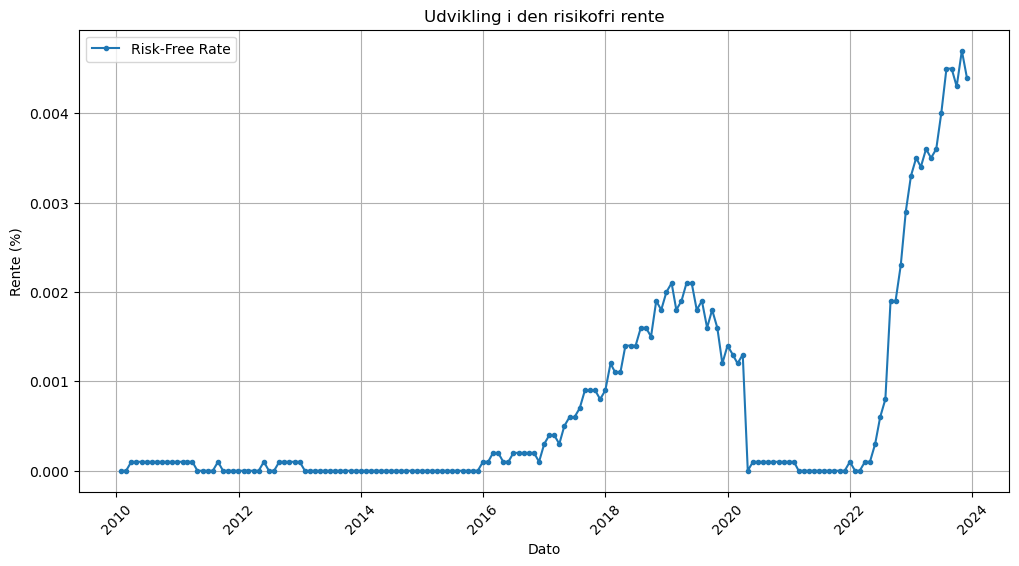

In [7]:
import matplotlib.pyplot as plt
import pandas as pd

# Konverter eom til datetime-format
risk_free_df['eom'] = pd.to_datetime(risk_free_df['eom'])

# Plot renteudviklingen
plt.figure(figsize=(12, 6))
plt.plot(risk_free_df['eom'], risk_free_df['rf'], marker='o', linestyle='-', markersize=3, label="Risk-Free Rate")

# Formatering af plot
plt.xlabel("Dato")
plt.ylabel("Rente (%)")
plt.title("Udvikling i den risikofri rente")
plt.grid(True)
plt.legend()
plt.xticks(rotation=45)  # Rotér datoetiketter for bedre læsbarhed

# Vis plot
plt.show()


In [61]:
import data_run_files
from data_run_files import monthly_returns
import General_Functions as GF

In [62]:
h_list = [1,2]
file_path_usa_test = "./data_test/usa_test.parquet"
monthly_returns(risk_free_df, h_list, file_path_usa_test)

,id,eom,eom_ret,ret_ld1,tr_ld1,horizon,ret_ld2
0,10104,2010-01-31,2010-02-28,0.042934,0.042934,1,NaN
1,10104,2010-02-28,2010-03-31,0.007960,0.007960,1,NaN
2,10104,2010-03-31,2010-04-30,-0.127589,-0.127489,1,NaN
3,10104,2010-04-30,2010-05-31,-0.049307,-0.049207,1,NaN
4,10104,2010-05-31,2010-06-30,0.103772,0.103872,1,NaN
...,...,...,...,...,...,...,...
57443,92655,2023-07-31,2023-08-31,NaN,0.062004,2,0.057504
57444,92655,2023-08-31,2023-09-30,NaN,0.032584,2,0.028084
57445,92655,2023-09-30,2023-10-31,NaN,-0.044489,2,-0.048789
57446,92655,2023-10-31,2023-11-30,NaN,0.004700,2,0.000000


# Market Returns data

In [41]:
market_returns=Prepare_Data.load_and_filter_market_returns(file_path_market_returns)

Filen er indlæst og filtreret succesfuldt.


In [42]:
market_returns

,eom,mkt_vw_exc
0,1926-01-31,-0.002409
1,1926-02-28,-0.035821
2,1926-03-31,-0.066672
3,1926-04-30,0.033847
4,1926-05-31,0.011772
...,...,...
1171,2023-08-31,-0.024497
1172,2023-09-30,-0.052473
1173,2023-10-31,-0.033872
1174,2023-11-30,0.089042
